## Data Analysis with Python - Project 1 (illumination)

##### Angelos Semoglou  s3332318


### Initialize Parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap # To create a custom color map for the heatmaps

n = 10 # Number of lamps

# Define the poistions/coordinates of the lamps (x,y,height)
lamps = np.array([[4.1, 20.4, 4],
                  [14.1, 21.3, 3.5],
                  [22.6, 17.1, 6],
                  [5.5, 12.3, 4.0],
                  [12.2, 9.7, 4.0],
                  [15.3, 13.8, 6],
                  [21.3, 10.5, 5.5],
                  [3.9, 3.3, 5.0],
                  [13.1, 4.3, 5.0],
                  [20.3, 4.2, 4.5]])

N = 25 # Size of the Grid
m = N * N # Number of Pixels in the grid

### Create Pixel Coordinates and Color Map

In [2]:
# Create a m x 2 matrix with coordinates of pixel centers 
#(geometric center of each individual pixel  - points to assign color intensity)

""" A 2D array which represents the coordinates of the centers of pixels in the grid
We compute two outer products of
an array of values raging from 0.5 to N-0.5 with a step size of 1
and an array of N ones 
each of these represent x and y coordinates. 
We use reshape to reshape the 2d arrays into column vectors with m rows and one column,
where m is the total number of pixels in the grid.
We use np.hstack to horizontally stack these two column vectors - 
each row contains a pair (x,y) coordinates which is a center of a pixel """

pixels = np.hstack([np.outer(np.arange(0.5, N, 1), np.ones(N)).reshape(m, 1),
                    np.outer(np.ones(N), np.arange(0.5, N, 1)).reshape(m, 1)])

# Create a custom color map for the heat/ heatmap
color_map = LinearSegmentedColormap.from_list('custom_colormap',
[(0.0, 'gray'), (0.25, 'blue'), (0.5, 'yellow'), (0.75, 'orange'), (1, 'red')], N = 256) 
# 256 color levels (standard number for colormaps)

### Calculate Matrix A and Normalize

In [3]:
# The m x n matrix A maps lamp powers to pixel intensities
# A[i,j] is inversely proportional to the squared distance of lamp j to pixel i 
# Initialize A as an m x n matrix filled with zeros 
A = np.zeros((m, n))

# Calculate each element of A
for i in range(m):
    for j in range(n):
        # The inverse squared distance between the pixel center and the lamp position
        A[i,j] = 1 / (np.linalg.norm(np.hstack([pixels[i,:], 0]) - lamps[j, :]) ** 2)

# Scale elements of A so that the average illumination is 1
A = (m / np.sum(A)) * A

### Solve the Least Squares Problem

In [4]:
# Define the desired illumination patern 
l_des = np.ones(m)

# Solve the least squares problem with the desired illumination pattern
lamp_powers = np.linalg.lstsq(A, l_des, rcond=None) # rcond parameter for the least squares solver set to None

### Calculate RMS Errors

In [5]:
# Calculate the optimal illumination pattern 
optimal_illumination = A @ np.asarray(lamp_powers[0])

# Calculate the initial illumination pattern
initial_illumination = A @ np.ones(n)

# Calculate RMS Error
# RMS error for the initial illumination pattern 
rms_error_initial = np.sqrt(np.mean((initial_illumination - l_des) ** 2))

# RMS error for the optimal illumination pattern
rms_error_optimal = np.sqrt(np.mean((optimal_illumination - l_des) ** 2))

### Plot Illumination Patterns

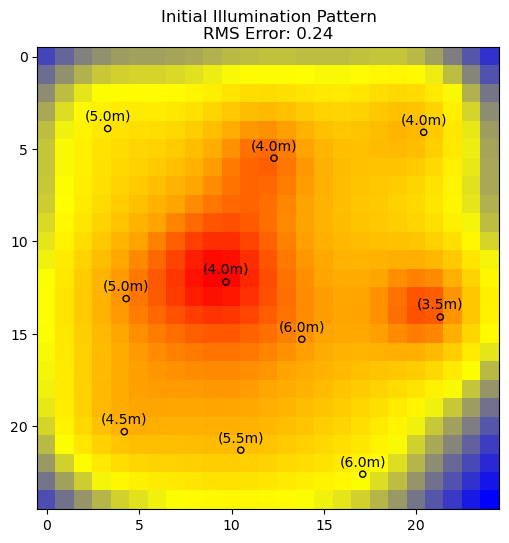

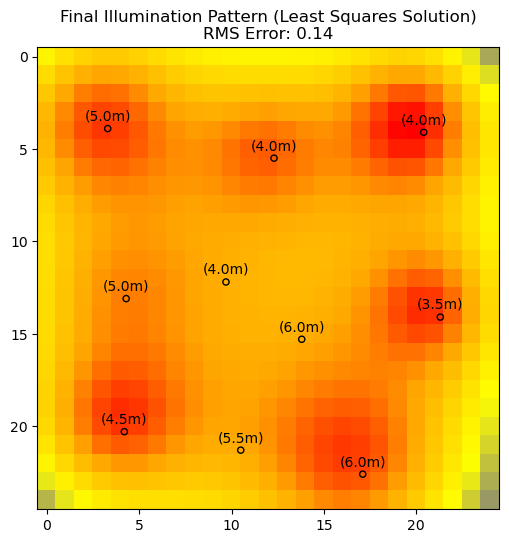

In [6]:
# Plot the Initial illumination pattern 
plt.figure(figsize=(6, 6)) 
plt.imshow(initial_illumination.reshape(N, N), cmap = color_map, vmin = 0, vmax = np.max(initial_illumination))
plt.title(f'Initial Illumination Pattern\nRMS Error: {rms_error_initial:.2f}')
plt.scatter(lamps[:,1], lamps[:,0], edgecolors = 'black', facecolors = 'None', s = 20) 
# Points as small open black circles to every (x,y) lamp
# Add height annotations
for i in range(n):
    plt.annotate(f'({lamps[i,2]:.1f}m)', (lamps[i,1], lamps[i,0] - 0.3), fontsize = 10, ha ='center', va ='bottom') 
    # lamp[i,0]-0.3 to have the annotation at a heigher level than the point - circle

# Plot the Final - least squares solution illumination pattern
plt.figure(figsize=(6, 6)) 
plt.imshow(optimal_illumination.reshape(N, N), cmap = color_map, vmin = 0, vmax = np.max(optimal_illumination))
plt.title(f'Final Illumination Pattern (Least Squares Solution)\nRMS Error: {rms_error_optimal:.2f}')
plt.scatter(lamps[:,1], lamps[:,0], edgecolors = 'black', facecolors = 'None', s = 20) 
for i in range(n):
    plt.annotate(f'({lamps[i,2]:.1f}m)', (lamps[i,1], lamps[i,0] - 0.3), fontsize = 10, ha ='center', va ='bottom') 
    
plt.show()

### Create Histograms of Illumination Values

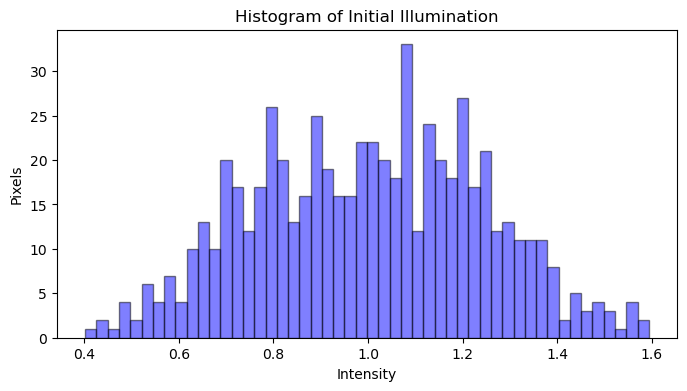

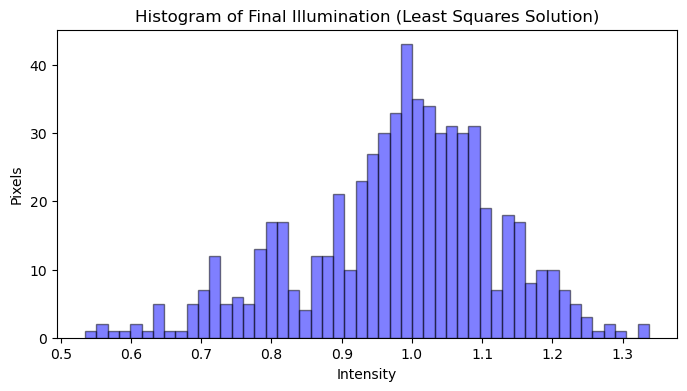

In [7]:
# Create histograms of pixel illumination values - Target intensity = 1
# Histogram of Initial Illumination
plt.figure(figsize=(8, 4))
plt.hist(initial_illumination, bins = 50, alpha = 0.5, color = 'blue', edgecolor = 'black')
plt.title('Histogram of Initial Illumination')
plt.xlabel('Intensity')
plt.ylabel('Pixels')

# Histogram of Final Illumination (Least Squares solution)
plt.figure(figsize=(8, 4))
plt.hist(optimal_illumination, bins = 50, alpha = 0.5, color = 'blue', edgecolor = 'black')
plt.title('Histogram of Final Illumination (Least Squares Solution)')
plt.xlabel('Intensity')
plt.ylabel('Pixels')

plt.show()

### Create Combined Histogram 

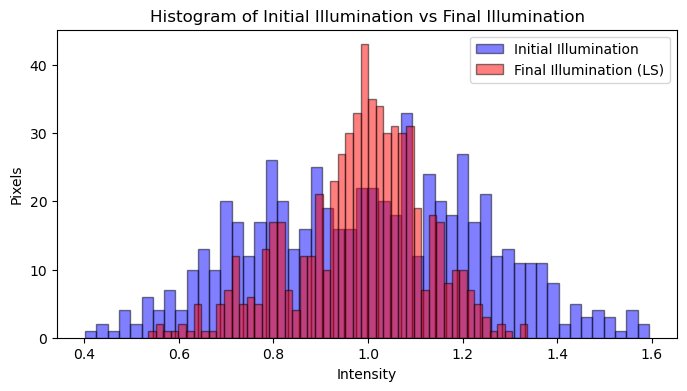

In [8]:
# Extra:
# Create a histogram for both illumination patterns to be easy to see the difference
plt.figure(figsize=(8, 4))
plt.hist(initial_illumination, bins = 50, alpha = 0.5, color = 'blue', edgecolor = 'black', label = 'Initial Illumination')
plt.hist(optimal_illumination, bins = 50, alpha = 0.5, color = 'red', edgecolor = 'black', label = 'Final Illumination (LS)')
plt.title('Histogram of Initial Illumination vs Final Illumination')
plt.xlabel('Intensity')
plt.ylabel('Pixels')
plt.legend()
plt.show()